# 数据探索部分

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
#防止炸内核
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
def load_data():
    train_part=pd.read_csv('C:/Users/LCP/Desktop/统计学习实现/练习/data/Default/train.csv')
    features=train_part.columns.tolist()
    return train_part,features

In [3]:
pd.set_option('display.max_columns',None)
pd.set_option('display.width',None)
pd.set_option('display.max_colwidth',None)

In [4]:
#加载数据及数据特征
Train_part,Feature=load_data()
#建立一个复制块以防止反复运行
Copy_DF=Train_part
#显示总特征的数量
len(Feature)

47

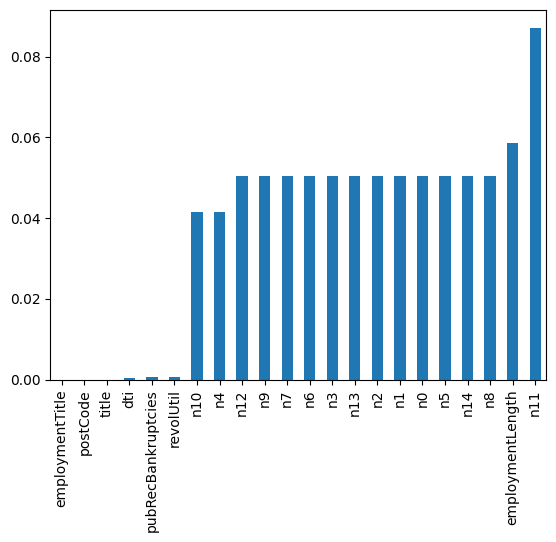

In [5]:
#查看各个特征的缺失率
null_fea=(Train_part.isnull().sum()/len(Train_part))
null_fea=null_fea[null_fea>0]
null_fea.sort_values(inplace=True)
null_fea.plot.bar()
plt.show()

看每个特征的缺失率，如果缺失率过高直接删除这一个特征，其余特征列可以考虑填充

In [6]:
#ID属性无意义，删除
Train_part.drop(columns=['id'],inplace=True)

In [7]:
#缺失值处理
Train_part.fillna(method='ffill',inplace=True)

In [8]:
Train_part.isnull().sum()

loanAmnt              0
term                  0
interestRate          0
installment           0
grade                 0
subGrade              0
employmentTitle       0
employmentLength      0
homeOwnership         0
annualIncome          0
verificationStatus    0
issueDate             0
isDefault             0
purpose               0
postCode              0
regionCode            0
dti                   0
delinquency_2years    0
ficoRangeLow          0
ficoRangeHigh         0
openAcc               0
pubRec                0
pubRecBankruptcies    0
revolBal              0
revolUtil             0
totalAcc              0
initialListStatus     0
applicationType       0
earliesCreditLine     0
title                 0
policyCode            0
n0                    0
n1                    0
n2                    0
n3                    0
n4                    0
n5                    0
n6                    0
n7                    0
n8                    0
n9                    0
n10             

下面需要分析哪些是定类变量，哪些是定量变量
由于可能人为对一些变量的类型进行修正

In [9]:
#查看定性类型与定量类型的属性,根据数据类型来选择
#object类型的数据认为是定性特征
object_feature=Train_part.select_dtypes(include=object).columns.tolist()
#其余认为是定量特征
num_feature=Train_part.select_dtypes(exclude=object).columns.tolist()
print('定性特征'+'\n',object_feature)
print('定量特征'+'\n',num_feature)

定性特征
 ['grade', 'subGrade', 'employmentLength', 'issueDate', 'earliesCreditLine']
定量特征
 ['loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'applicationType', 'title', 'policyCode', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14']


这些特征的划分比较粗略，需要人工从中剔除一部分

In [10]:
#查看定性类型的属性
Train_part[object_feature].head()

,grade,subGrade,employmentLength,issueDate,earliesCreditLine
0,E,E2,2 years,2014-07-01,Aug-2001
1,D,D2,5 years,2012-08-01,May-2002
2,D,D3,8 years,2015-10-01,May-2006
3,A,A4,10+ years,2015-08-01,May-1999
4,C,C2,10+ years,2016-03-01,Aug-1977


In [11]:
#把标签从数量特征中删去
num_feature.remove('isDefault')

In [12]:
#查看贷款申请类型属性，该类型应该属于定性特征，查看其分布
print(Train_part['applicationType'].value_counts())

0    784586
1     15414
Name: applicationType, dtype: int64


In [13]:
#该类型分布过于不均衡，删除
Train_part.drop(columns=['applicationType'],inplace=True)
num_feature.remove('applicationType')

In [14]:
#查看政策属性
print(Train_part['policyCode'].value_counts())

1.0    800000
Name: policyCode, dtype: int64


In [15]:
#只有一个值，特征无意义，删除
Train_part.drop(columns=['policyCode'],inplace=True)
num_feature.remove('policyCode')

In [16]:
#查看homeownership属性，这个特征可能为定性属性
print(Train_part['homeOwnership'].value_counts())

0    395732
1    317660
2     86309
3       185
5        81
4        33
Name: homeOwnership, dtype: int64


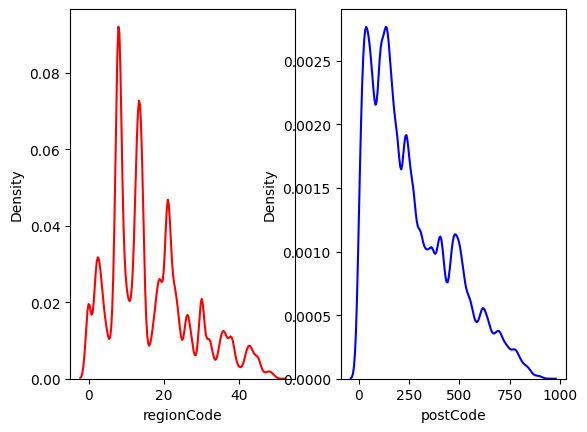

In [17]:
#地区编码和邮编应该有关联，查看这两个变量的分布，分布类似则可以直接选择其中一个进行分析
fig=plt.figure()
ax1=fig.add_subplot(1,2,1)
ax1=sns.kdeplot(Train_part['regionCode'].values,color='r')
plt.xlabel('regionCode')
ax2=fig.add_subplot(1,2,2)
ax2=sns.kdeplot(Train_part['postCode'].values,color='b')
plt.xlabel('postCode')
plt.show()

In [18]:
#查询相关系数
print(Train_part.corr()['regionCode']['postCode'])

0.1923834738378139


In [29]:
#查看审批状态属性
print(Train_part['verificationStatus'].value_counts())

1    309810
2    248968
0    241222
Name: verificationStatus, dtype: int64


In [30]:
#审批状态属于定性特征
num_feature.remove('verificationStatus')
object_feature.append('verificationStatus')

In [31]:
#工作时长是定量特征，删除工作时长的单位，转为定量描述
Train_part['employmentLength']=Train_part['employmentLength'].astype(str)
Train_part['employmentLength']=Train_part['employmentLength'].map(lambda value:value.replace('years',''))
Train_part['employmentLength']=Train_part['employmentLength'].map(lambda value:value.replace('+',''))
Train_part['employmentLength']=Train_part['employmentLength'].map(lambda value:value.replace('year',''))
Train_part['employmentLength']=Train_part['employmentLength'].map(lambda value:value.replace('< 1','0'))
Train_part['employmentLength']=Train_part['employmentLength'].astype(float)
#更新定量与定性的特征列表
num_feature.append('employmentLength')
object_feature.remove('employmentLength')

In [32]:
#构造新特征,从最早信用记录和贷款方法日期构建贷款使用时间长度
Train_part['issueDate']=Train_part['issueDate'].map(lambda value:value[:4])
Train_part['earliesCreditLine']=Train_part['earliesCreditLine'].map(lambda value:value[-4:])
Train_part['issueDate']=Train_part['issueDate'].astype(float)
Train_part['earliesCreditLine']=Train_part['earliesCreditLine'].astype(float)
#构造完成后，这两个特征可以删除
Train_part['issue_Time']=Train_part['issueDate']-Train_part['earliesCreditLine']
Train_part.drop(columns=['issueDate','earliesCreditLine'],inplace=True)
#更新存放定性特征与定量特征的列表
object_feature.remove('issueDate')
object_feature.remove('earliesCreditLine')
num_feature.append('issue_Time')

In [33]:
#重新查看定性特征与定量特征
print(object_feature)
print(num_feature)

['grade', 'subGrade', 'verificationStatus']
['loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n11', 'n12', 'n13', 'n14', 'employmentLength', 'issue_Time']


In [20]:
#查看定性特征中的变量分布，找出分布不均的
for item in object_feature:
    temp_dict=Train_part[item].value_counts()
    if max(temp_dict.values)>=(len(Train_part)*0.8):
        print('特征名:',item)

In [21]:
#找出定量变量中连续型变量与离散型变量
#通过统计特征中的值的个数，小于等于10认为属于离散变量，大于10认为属于连续变量
def get_contious(DataFrame,feature):
    contious=[]
    dispersed=[]
    for item in feature:
        temp=DataFrame[item].nunique()
        if temp<=10:
            dispersed.append(item)
        else:
            contious.append(item)
    return contious,dispersed

contious,dispersed=get_contious(Train_part,num_feature)

#连续型变量
print(contious)
#离散型变量
print(dispersed)

['loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'delinquency_2years', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'pubRec', 'pubRecBankruptcies', 'revolBal', 'revolUtil', 'totalAcc', 'title', 'n0', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n13', 'n14']
['term', 'homeOwnership', 'verificationStatus', 'initialListStatus', 'n11', 'n12']


In [23]:
#查看离散型变量的变量分布，分布如果严重倾斜可以删去
#同时离散变量里也可能有属于定性特征的
for item in dispersed:
    temp_dict=Train_part[item].value_counts()
    if max(temp_dict.values)>=(len(Train_part)*0.9):
        print('特征名:',item)

特征名: n11
特征名: n12


In [24]:
#n11、n12的倾斜太严重，删去
Train_part.drop(columns=['n11','n12'],inplace=True)

dispersed.remove('n11')
dispersed.remove('n12')

num_feature.remove('n11')
num_feature.remove('n12')

In [25]:
#贷款列表的初始状态属于定性特征:
num_feature.remove('initialListStatus')
object_feature.append('initialListStatus')
dispersed.remove('initialListStatus')

KeyboardInterrupt: 

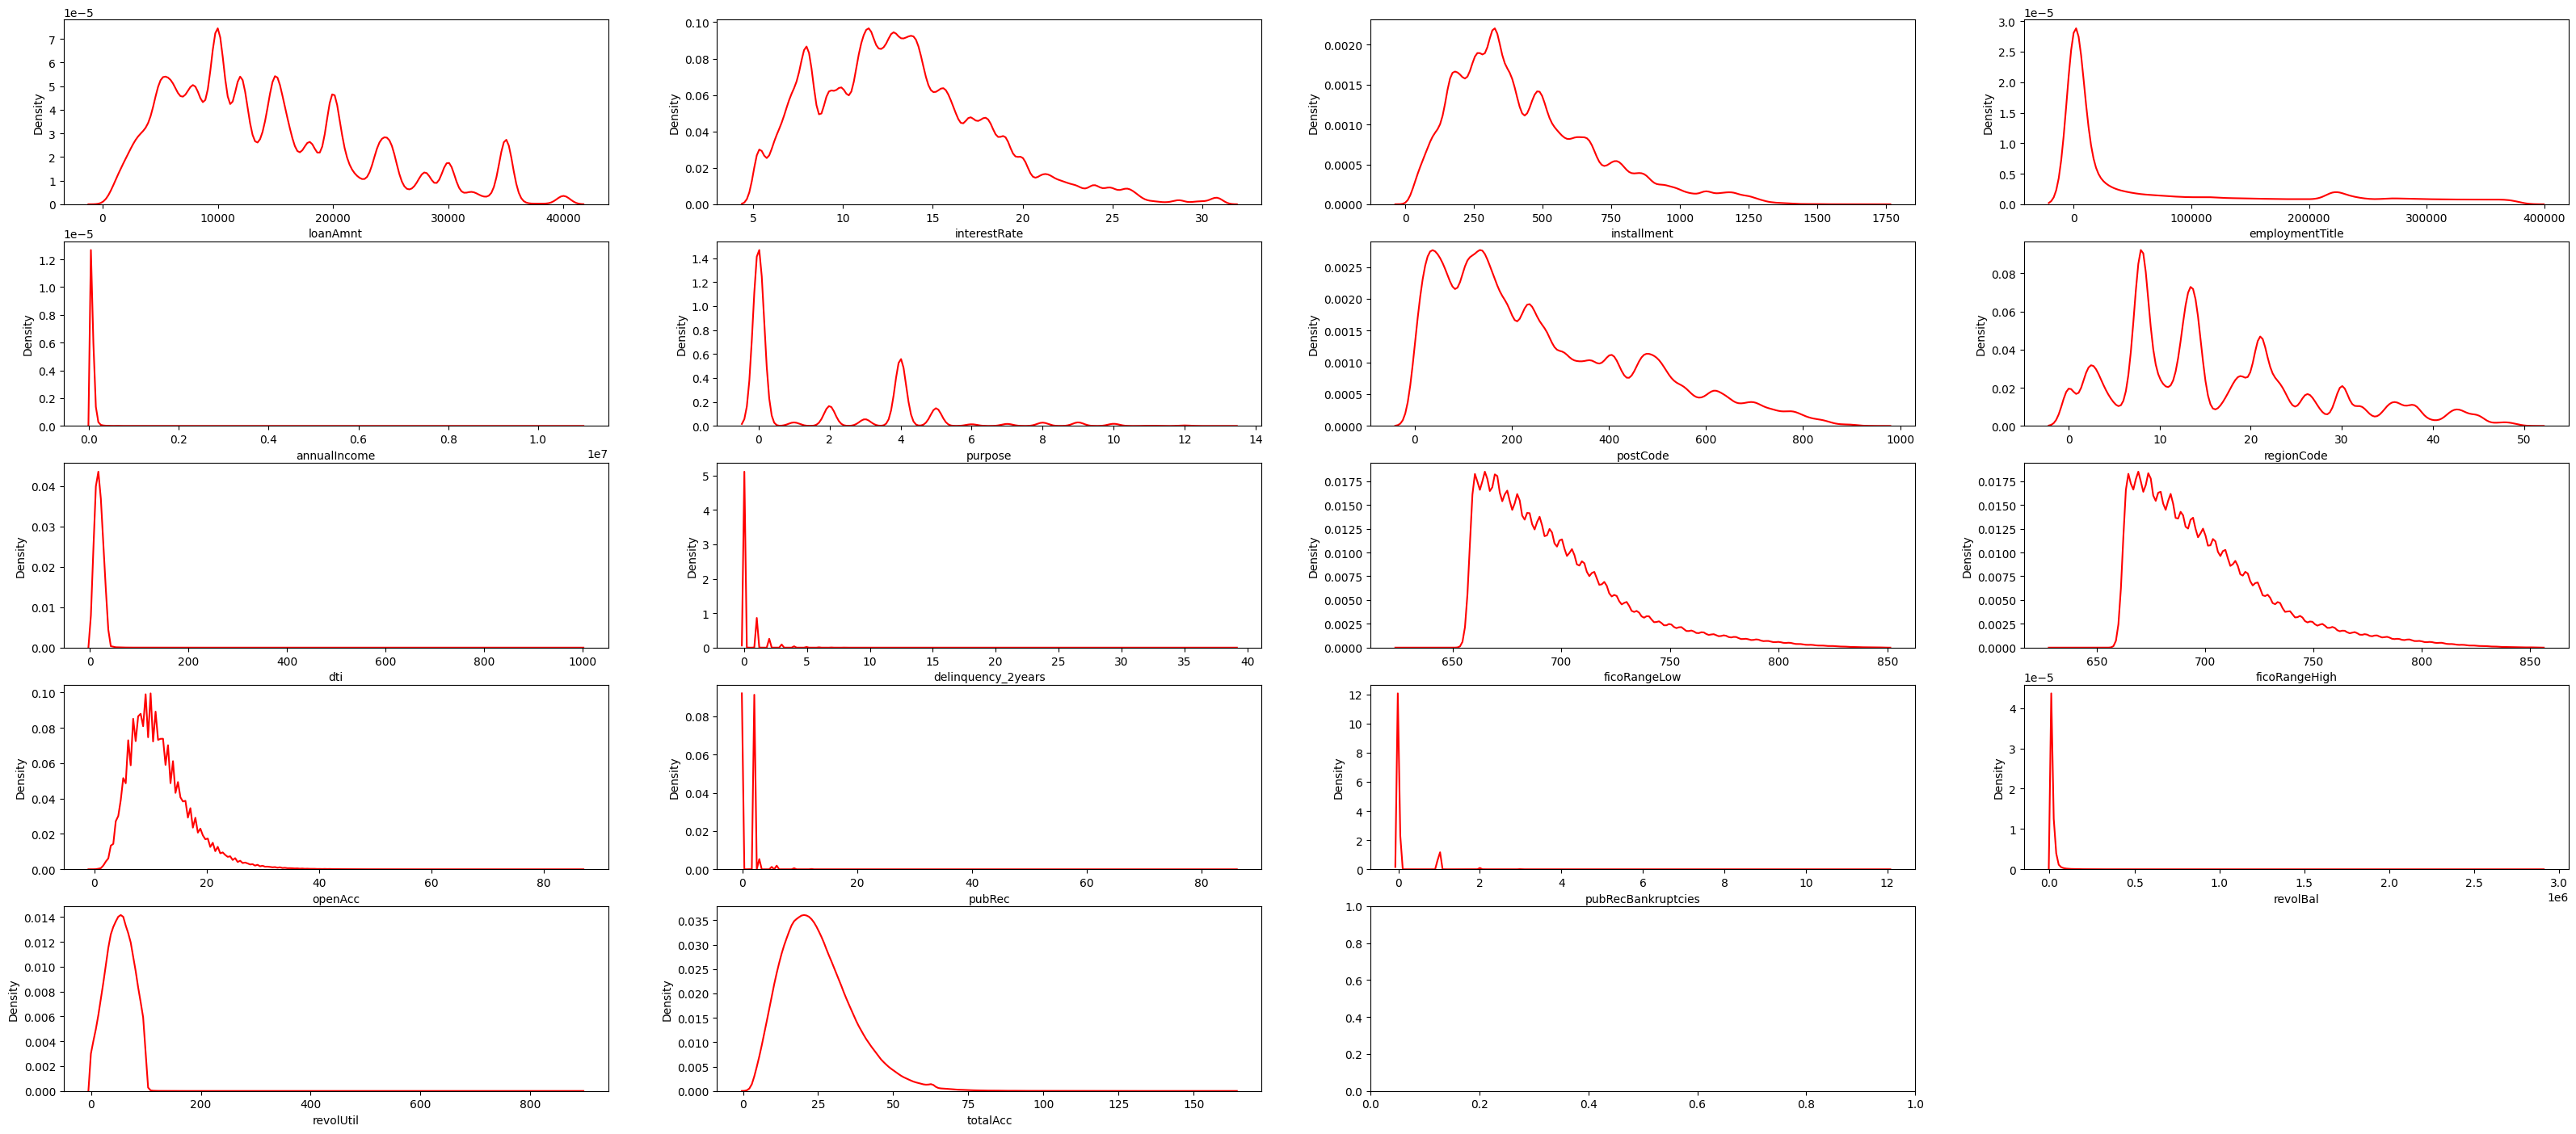

In [27]:
#对于连续型的变量，需要观察数据的分布
#一些变量可能服从对数正态分布，所以这里需要画两个图
fig=plt.figure(figsize=(40,60))

j=1
for i in range(len(contious)):
        ax0=fig.add_subplot(17,4,j)
        sns.kdeplot(Train_part[contious[i]],color='r',ax=ax0)
        plt.xlabel(contious[i])
        j+=1

plt.show()

In [40]:
#一些变量可以看做服从对数正态分布,对他们进行对数变换
lognormal=['revolBal','annualIncome']
for item in lognormal:
    Train_part[item]=np.log(Train_part[item]+1e+5)

In [41]:
print(lognormal)

['revolBal', 'annualIncome']


In [42]:
normal_list=['revolUtil','issue_Time','totalAcc']
normal_list

['revolUtil', 'issue_Time', 'totalAcc']

In [43]:
#对于一些分布明显不均匀的变量可以删除
temp_columns=['delinquency_2years','n13','title','pubRec','n0','pubRecBankruptcies']
Train_part.drop(columns=temp_columns,inplace=True)
for item in temp_columns:
    contious.remove(item)
    num_feature.remove(item)

In [44]:
#将处理好的数据写入CSV文件
Train_part.to_csv('EDA.csv')

可用的定量特征

In [45]:
print(num_feature)

['loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'revolBal', 'revolUtil', 'totalAcc', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n14', 'employmentLength', 'issue_Time']


可用的定性特征

In [46]:
print(object_feature)

['grade', 'subGrade', 'verificationStatus', 'initialListStatus']


可用的连续特征

In [47]:
print(contious)

['loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 'purpose', 'postCode', 'regionCode', 'dti', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'revolBal', 'revolUtil', 'totalAcc', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n14', 'employmentLength', 'issue_Time']


可用的离散特征

In [48]:
print(dispersed)

['term', 'homeOwnership']


# 特征工程部分与模型训练

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [2]:
#加载处理过的数据并分隔为验证集和训练集
from sklearn.model_selection import train_test_split

def Load_DataSet():
    DataSet=pd.read_csv('EDA.csv',index_col=0)
    Features=DataSet.columns.tolist()
    DataSet=np.array(DataSet)
    Train_D,Test_D=train_test_split(DataSet,test_size=0.2)
    Train_D=pd.DataFrame(Train_D,columns=Features)
    Test_D=pd.DataFrame(Test_D,columns=Features)
    return Train_D,Test_D,Features

Train_D,Test_D,Fea=Load_DataSet()

In [3]:
#对于定量特征重新转化数据类型，便于分析
num_feature=['loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'purpose', 'regionCode', 'dti', 'ficoRangeLow', 'ficoRangeHigh', 
            'openAcc', 'revolBal', 'revolUtil', 'totalAcc', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n14', 'employmentLength', 'issue_Time']

for item in num_feature:
    Train_D[item]=Train_D[item].astype(float)

#把标签也转化为数字特征以便于分析
Train_D['isDefault']=Train_D['isDefault'].astype(int)

In [4]:
#这些特征属于定性特征，需要进行数值处理
object_feature=['grade', 'subGrade', 'verificationStatus', 'initialListStatus']

#前两个等级需要进行编码
for item in ['grade', 'subGrade']:
    Train_D[item]=Train_D[item].astype(str)
    Test_D[item]=Test_D[item].astype(str)

In [5]:
#grade类型具有等级区分，用数字进行标识
for data in [Train_D,Test_D]:
    data['grade']=data['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [6]:
Train_D.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n3,n4,n5,n6,n7,n8,n9,n10,n14,issue_Time
0,16000.0,3.0,6.03,486.97,1,A1,238797.0,10.0,0.0,12.409013,...,3.0,5.0,14.0,2.0,8.0,24.0,3.0,9.0,0.0,20.0
1,14000.0,5.0,12.99,318.48,2,B4,18826.0,10.0,0.0,12.206073,...,4.0,6.0,8.0,7.0,9.0,16.0,4.0,14.0,2.0,35.0
2,18250.0,3.0,11.49,601.73,2,B5,422.0,8.0,2.0,11.982929,...,12.0,7.0,7.0,1.0,16.0,22.0,13.0,16.0,4.0,29.0
3,8000.0,3.0,13.99,273.39,3,C4,29.0,10.0,1.0,11.952605,...,11.0,3.0,5.0,0.0,15.0,19.0,11.0,16.0,4.0,32.0
4,10200.0,5.0,13.18,233.03,3,C3,11289.0,10.0,0.0,11.835009,...,11.0,1.0,6.0,1.0,11.0,18.0,11.0,14.0,2.0,11.0


In [7]:
#subGrade采用ASCII码
for data in [Train_D,Test_D]:
    data['subGrade']=data['subGrade'].map(lambda x:ord(x[0])*100+int(x[1]))

In [8]:
#查看编码之后的数据
Train_D.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n3,n4,n5,n6,n7,n8,n9,n10,n14,issue_Time
0,16000.0,3.0,6.03,486.97,1,6501,238797.0,10.0,0.0,12.409013,...,3.0,5.0,14.0,2.0,8.0,24.0,3.0,9.0,0.0,20.0
1,14000.0,5.0,12.99,318.48,2,6604,18826.0,10.0,0.0,12.206073,...,4.0,6.0,8.0,7.0,9.0,16.0,4.0,14.0,2.0,35.0
2,18250.0,3.0,11.49,601.73,2,6605,422.0,8.0,2.0,11.982929,...,12.0,7.0,7.0,1.0,16.0,22.0,13.0,16.0,4.0,29.0
3,8000.0,3.0,13.99,273.39,3,6704,29.0,10.0,1.0,11.952605,...,11.0,3.0,5.0,0.0,15.0,19.0,11.0,16.0,4.0,32.0
4,10200.0,5.0,13.18,233.03,3,6703,11289.0,10.0,0.0,11.835009,...,11.0,1.0,6.0,1.0,11.0,18.0,11.0,14.0,2.0,11.0


In [9]:
#自己定义一个新的用于DF类型的标准化转换器
#fit实现思路：类中包含一个字典，字典中为每个需要转化的特征训练一个标准化的模型
#transform实现思路，对输入的DF数据进行转化
import sklearn
class num_stander:
    def __init__(self,fealist=[]):
        self.trans={}
        self.fea=fealist
        
    def fit(self,DF):
        for item in self.fea:
            self.trans[item]=sklearn.preprocessing.StandardScaler()
            self.trans[item].fit(np.array(DF[item]).reshape(-1,1))
    
    def transform(self,DF):
        for item in self.fea:
            DF[item]=self.trans[item].transform(np.array(DF[item]).reshape(-1,1))
        return DF   
    
contious_fea=['loanAmnt', 'interestRate', 'installment', 'employmentTitle', 'annualIncome', 
              'purpose', 'postCode', 'regionCode', 'dti', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc',
              'revolBal', 'revolUtil', 'totalAcc', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 
              'n10', 'n14', 'employmentLength', 'issue_Time']

transformer=num_stander(contious_fea)
transformer.fit(Train_D)
Train_D=transformer.transform(Train_D)

In [10]:
Train_D.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n3,n4,n5,n6,n7,n8,n9,n10,n14,issue_Time
0,0.181753,3.0,-1.512481,0.187606,1,6501,1.565560,1.093500,0.0,1.577815,...,-0.800067,0.090783,1.227878,-0.887792,-0.062141,1.154775,-0.806101,-0.481960,-1.181935,0.494907
1,-0.047804,5.0,-0.052012,-0.457116,2,6604,-0.498917,1.093500,0.0,0.691778,...,-0.497452,0.430168,-0.022254,-0.212082,0.157108,0.169838,-0.495328,0.430488,-0.096228,2.492120
2,0.440004,3.0,-0.366769,0.626733,2,6605,-0.671643,0.551604,2.0,-0.282464,...,1.923468,0.769553,-0.230609,-1.022934,1.691849,0.908540,2.301635,0.795467,0.989478,1.693235
3,-0.736473,3.0,0.157825,-0.629652,3,6704,-0.675332,1.093500,1.0,-0.414858,...,1.620853,-0.587987,-0.647320,-1.158075,1.472600,0.539189,1.680088,0.795467,0.989478,2.092678
4,-0.483961,5.0,-0.012143,-0.784089,3,6703,-0.569654,1.093500,0.0,-0.928281,...,1.620853,-1.266757,-0.438964,-1.022934,0.595606,0.416072,1.680088,0.430488,-0.096228,-0.703421


In [11]:
#剔除训练数据中连续变量的异常值,针对符合正态分布的变量
n_list=['revolBal','annualIncome','revolUtil','issue_Time','totalAcc']
means={}
stds={}
for item in n_list:
    temp_data=Train_D[item]
    means[item]=temp_data.mean()
    stds[item]=temp_data.std()
    
for item in n_list:
    mean=means[item]
    std=stds[item]
    temp_data=Train_D[item]
    bidx=(temp_data<mean-3*std)|(mean+3*std<temp_data)
    idx=np.arange(len(Train_D))[bidx]
    Train_D.drop(index=idx,inplace=True)
    Train_D.reset_index(drop=True,inplace=True)
    

In [12]:
#构造训练数据
x_train_s=np.array(Train_D.drop(columns=['isDefault']))
y_train=np.array(Train_D['isDefault']).astype(int)
x_test_s=np.array(Test_D.drop(columns=['isDefault']))
y_test=np.array(Test_D['isDefault']).astype(int)

np.shape(x_train_s)

(608652, 34)

In [14]:
#selectFromModel方法选择特征
from sklearn.feature_selection import SelectFromModel
from sklearn.tree import DecisionTreeClassifier
select_Trans=SelectFromModel(DecisionTreeClassifier(),threshold=0.015)
select_Trans.fit(x_train_s,y_train)

#查看阈值情况
select_Trans.estimator_.feature_importances_

array([0.02444125, 0.00583721, 0.03535656, 0.04505056, 0.01086611,
       0.06943945, 0.05993581, 0.02469335, 0.00876208, 0.05170218,
       0.01024904, 0.01445359, 0.05891078, 0.04065312, 0.06499352,
       0.01748755, 0.01786349, 0.01841197, 0.05884362, 0.05624955,
       0.03560242, 0.00588026, 0.01816009, 0.01086969, 0.01082815,
       0.01969326, 0.02712251, 0.03388833, 0.02060336, 0.02934708,
       0.01315689, 0.01909014, 0.02130078, 0.04025624])

In [44]:
select_Trans.threshold=0.01
x_train=select_Trans.transform(x_train_s)
x_test=select_Trans.transform(x_test_s)
np.shape(x_train)

(608652, 31)

In [45]:
#训练LGBM模型
from lightgbm.sklearn import LGBMClassifier
LGBM=LGBMClassifier(max_depth=10,n_estimators=500)
LGBM.fit(x_train,y_train)

LGBMClassifier(max_depth=10, n_estimators=500)

In [46]:
#查看模型在训练集上的性能
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
y_train_pred=LGBM.predict(x_train)
print('准确率:',accuracy_score(y_true=y_train,y_pred=y_train_pred))
print('召回率:',recall_score(y_train,y_train_pred,pos_label=1))

准确率: 0.8104039746850417
召回率: 0.10732150605418062


In [47]:
#查看测试集上的准确率和召回率
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
y_test_pred=LGBM.predict(x_test)
print('准确率:',accuracy_score(y_true=y_test,y_pred=y_test_pred))
print('召回率:',recall_score(y_test,y_test_pred,pos_label=1))

准确率: 0.71970625
召回率: 0.2586858123926955


In [48]:
y_test_prob=LGBM.predict_proba(x_test)[:,1]
print(y_test_prob)

[0.33397622 0.43502364 0.51882455 ... 0.1497255  0.19685734 0.23330998]


In [55]:
#调整阈值
thresh=0.35
y_test_pred=(y_test_prob>=thresh)
y_test_pred=y_test_pred.astype(int)
print(accuracy_score(y_true=y_test,y_pred=y_test_pred))
print(recall_score(y_true=y_test,y_pred=y_test_pred))

0.61424375
0.5242078976119869


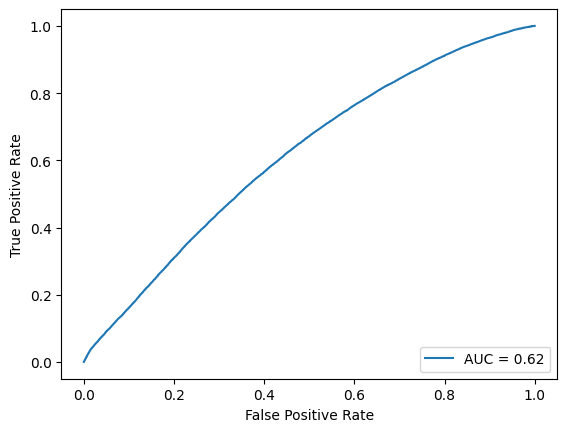

In [56]:
from sklearn.metrics import RocCurveDisplay
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
fpr,tpr,thres=roc_curve(y_true=y_test,y_score=y_test_prob,pos_label=1)
RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc_score(y_test,y_test_prob)).plot()

In [35]:
#保存模型
joblib.dump(LGBM,'Default_clf.pkl') 
joblib.dump(select_Trans,'Transformer.pkl')

['Transformer.pkl']

In [39]:
print(Fea)

['loanAmnt', 'term', 'interestRate', 'installment', 'grade', 'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome', 'verificationStatus', 'isDefault', 'purpose', 'regionCode', 'dti', 'ficoRangeLow', 'ficoRangeHigh', 'openAcc', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n14', 'issue_Time']


# 在测试集上应用模型

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import joblib
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

In [14]:
#加载模型
clf=joblib.load('Default_clf.pkl')
Transformer=joblib.load('Transformer.pkl')

In [15]:
#加载测试数据:
Test_part=pd.read_csv('data/Default/testA.csv')

In [16]:
Test_part.fillna(method='ffill',inplace=True)

In [17]:
#按照特征处理部分,处理工作时长问题
Test_part['employmentLength']=Test_part['employmentLength'].astype(str)
Test_part['employmentLength']=Test_part['employmentLength'].map(lambda value:value.replace('years',''))
Test_part['employmentLength']=Test_part['employmentLength'].map(lambda value:value.replace('+',''))
Test_part['employmentLength']=Test_part['employmentLength'].map(lambda value:value.replace('year',''))
Test_part['employmentLength']=Test_part['employmentLength'].map(lambda value:value.replace('< 1','0'))
Test_part['employmentLength']=Test_part['employmentLength'].astype(float)

In [18]:
#构造新特征
def Creat_new(Train_part):
    Train_part['issueDate']=Train_part['issueDate'].map(lambda value:value[:4])
    Train_part['earliesCreditLine']=Train_part['earliesCreditLine'].map(lambda value:value[-4:])
    Train_part['issueDate']=Train_part['issueDate'].astype(float)
    Train_part['earliesCreditLine']=Train_part['earliesCreditLine'].astype(float)
    #构造完成后，这两个特征可以删除
    Train_part['issue_Time']=Train_part['issueDate']-Train_part['earliesCreditLine']
    Train_part.drop(columns=['issueDate','earliesCreditLine'],inplace=True)
    return Train_part
Test_part=Creat_new(Test_part)

In [19]:
Test_part.head()

,id,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,...,n6,n7,n8,n9,n10,n11,n12,n13,n14,issue_Time
0,800000,14000.0,3,10.99,458.28,B,B3,7027.0,10.0,0,...,4.0,15.0,19.0,6.0,17.0,0.0,0.0,1.0,3.0,40.0
1,800001,20000.0,5,14.65,472.14,C,C5,60426.0,10.0,0,...,3.0,3.0,9.0,3.0,5.0,0.0,0.0,2.0,2.0,14.0
2,800002,12000.0,3,19.99,445.91,D,D4,23547.0,2.0,1,...,36.0,5.0,6.0,4.0,12.0,0.0,0.0,0.0,7.0,10.0
3,800003,17500.0,5,14.31,410.02,C,C4,636.0,4.0,0,...,2.0,8.0,14.0,2.0,10.0,0.0,0.0,0.0,3.0,12.0
4,800004,35000.0,3,17.09,1249.42,D,D1,368446.0,0.0,1,...,3.0,16.0,18.0,11.0,19.0,0.0,0.0,0.0,1.0,17.0


In [20]:
id_list=Test_part['id'].tolist()

In [21]:
Feature=['loanAmnt', 'term', 'interestRate', 'installment', 'grade',
         'subGrade', 'employmentTitle', 'employmentLength', 'homeOwnership', 'annualIncome', 
         'verificationStatus', 'purpose', 'regionCode', 'dti', 'ficoRangeLow', 'ficoRangeHigh',
         'openAcc', 'revolBal', 'revolUtil', 'totalAcc', 'initialListStatus', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n14', 'issue_Time']
Test_part=Test_part[Feature]

num_feature=['loanAmnt', 'term', 'interestRate', 'installment', 'employmentTitle', 'homeOwnership', 'annualIncome', 'purpose', 'regionCode', 'dti', 'ficoRangeLow', 'ficoRangeHigh', 
            'openAcc', 'revolBal', 'revolUtil', 'totalAcc', 'n1', 'n2', 'n3', 'n4', 'n5', 'n6', 'n7', 'n8', 'n9', 'n10', 'n14', 'employmentLength', 'issue_Time']

for item in num_feature:
    Test_part[item]=Test_part[item].astype(float)

In [22]:
#这些特征属于定性特征，需要进行数值处理
object_feature=['grade', 'subGrade', 'verificationStatus', 'initialListStatus']

#前两个等级需要进行编码
for item in ['grade', 'subGrade']:
    Test_part[item]=Test_part[item].astype(str)


Test_part['subGrade']=Test_part['subGrade'].map(lambda x:ord(x[0])*100+int(x[1]))

Test_part['grade']=Test_part['grade'].map({'A':1,'B':2,'C':3,'D':4,'E':5,'F':6,'G':7})

In [23]:
Test_part.head()

,loanAmnt,term,interestRate,installment,grade,subGrade,employmentTitle,employmentLength,homeOwnership,annualIncome,...,n3,n4,n5,n6,n7,n8,n9,n10,n14,issue_Time
0,14000.0,3.0,10.99,458.28,2,6603,7027.0,10.0,0.0,80000.0,...,6.0,6.0,8.0,4.0,15.0,19.0,6.0,17.0,3.0,40.0
1,20000.0,5.0,14.65,472.14,3,6705,60426.0,10.0,0.0,50000.0,...,3.0,1.0,1.0,3.0,3.0,9.0,3.0,5.0,2.0,14.0
2,12000.0,3.0,19.99,445.91,4,6804,23547.0,2.0,1.0,60000.0,...,4.0,1.0,1.0,36.0,5.0,6.0,4.0,12.0,7.0,10.0
3,17500.0,5.0,14.31,410.02,3,6704,636.0,4.0,0.0,37000.0,...,2.0,4.0,7.0,2.0,8.0,14.0,2.0,10.0,3.0,12.0
4,35000.0,3.0,17.09,1249.42,4,6801,368446.0,0.0,1.0,80000.0,...,11.0,9.0,11.0,3.0,16.0,18.0,11.0,19.0,1.0,17.0


In [24]:
#构造测试数据
TestData=np.array(Test_part)
print(np.shape(TestData))

(200000, 33)


In [25]:
TestData_sele=Transformer.transform(TestData)
np.shape(TestData_sele)

(200000, 29)

In [26]:
proba=clf.predict_proba(TestData_sele)[:,1]

In [1]:
sub_part=pd.DataFrame({'id':id_list,'isDefault':proba})

NameError: name 'pd' is not defined

In [16]:
sub_part.head()

,id,isDefault
0,800000,0.044856
1,800001,0.498293
2,800002,0.423753
3,800003,0.258602
4,800004,0.296998


In [17]:
sub_part.to_csv('submit.csv')